In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation, Dropout
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
import numpy as np
from numpy import array
import pandas as pd

from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.layers import Embedding,Activation,Dropout

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train_ds = pd.read_csv("/content/drive/My Drive/NLP/Glove/Data_lemma/Train_lemma_40000.csv")
train_ds.shape

(40000, 2)

In [ ]:
train_text = train_ds['text'].tolist()
train_text[:3]

['grow b watch love mate school watch play school lunch school want virgil scott want alan count art form take child movie hope glimpse love child bitterly disappointing high point snappy theme tune compare original score thankfully early saturday morning television channel play reruns series gerry wife create jonatha frakes hand director chair version completely hopeless waste film utter rubbish cgi remake acceptable replacing marionette homo sapiens subsp sapiens huge error judgment',
 'movie dvd player sit coke chip expectation hope movie contain strongpoint movie awsome animation good flow story excellent voice cast funny comedy soundtrack disappointment find atlantis milos return read review let follow paragraph direct see movie enjoy primarily point mentionedbr br scene appear shock pick atlantis milos return displaycase local expectation music feel bad imitation movie voice cast replace fitting exception character like voice sweet actual drawing be not bad animation particular s

In [ ]:
y = train_ds['label']

In [ ]:
token = Tokenizer()
token.fit_on_texts(train_text)

In [ ]:
vocab_size = len(token.word_index)+1
vocab_size

132378

In [ ]:
print(token.index_word)

{1: 'br', 2: 'movie', 3: 'film', 4: 'not', 5: 'like', 6: 'pron', 7: 'good', 8: 'do', 9: 's', 10: 'be', 11: 'time', 12: 'character', 13: 'watch', 14: 'bad', 15: 'story', 16: 'see', 17: 'think', 18: 'scene', 19: 'great', 20: 'look', 21: 'know', 22: 'people', 23: 'go', 24: 'end', 25: 'get', 26: 'have', 27: 'love', 28: 'way', 29: 'play', 30: 'thing', 31: 'come', 32: 'find', 33: 'man', 34: 'act', 35: 'plot', 36: 'make', 37: 'actor', 38: 'want', 39: 'work', 40: 'life', 41: 'little', 42: 'try', 43: 'year', 44: 'feel', 45: 'give', 46: 'take', 47: 'lot', 48: 'old', 49: 'show', 50: 'director', 51: 'real', 52: 'guy', 53: 'performance', 54: 'actually', 55: 'funny', 56: 'say', 57: 'woman', 58: 'cast', 59: 'big', 60: 'tell', 61: 'new', 62: 'leave', 63: 'role', 64: 'young', 65: 'start', 66: 'can', 67: 'point', 68: 'that', 69: 'girl', 70: 'turn', 71: 'world', 72: 'fact', 73: 'pretty', 74: 'live', 75: 'star', 76: 'set', 77: 'horror', 78: 'day', 79: 'minute', 80: 'happen', 81: 'well', 82: 'kill', 83: 'l

In [ ]:
encoded_text = token.texts_to_sequences(train_text)

In [ ]:
print(encoded_text[:3])

[[399, 702, 13, 27, 2265, 223, 13, 29, 223, 4583, 223, 38, 13046, 838, 38, 1388, 903, 290, 474, 46, 131, 2, 149, 1819, 27, 131, 9782, 1215, 146, 67, 6113, 371, 1294, 438, 92, 339, 1902, 185, 1798, 1431, 494, 761, 29, 15443, 94, 9091, 189, 241, 58672, 31846, 229, 50, 2122, 156, 197, 3582, 155, 3, 1370, 1513, 1258, 654, 2696, 43701, 22570, 13896, 31847, 58673, 31847, 429, 2235, 4337], [2, 143, 776, 267, 5535, 4190, 953, 149, 2, 578, 36508, 2, 20078, 599, 7, 1401, 15, 175, 325, 58, 55, 84, 515, 1048, 32, 4247, 8780, 373, 132, 243, 119, 164, 6560, 173, 16, 2, 89, 3146, 67, 21219, 1, 18, 194, 731, 416, 4247, 8780, 373, 58674, 434, 953, 91, 44, 14, 3354, 2, 325, 58, 1389, 4126, 959, 12, 5, 325, 802, 571, 4338, 10, 4, 14, 599, 596, 433, 1185, 512, 73, 517, 5, 136, 36509, 479, 6561, 15, 25, 11, 8, 4, 10672, 7, 36509, 136, 8, 4, 114, 479, 11, 15444, 1, 125, 26, 4, 16, 2, 8, 4, 127, 205, 523, 454, 574, 243, 2, 13047, 1459, 5, 36509, 5, 2, 8, 4, 89, 2, 877, 7, 108, 2, 99, 4, 21, 81, 8780, 373, 43

In [ ]:
max_length = 150

In [ ]:
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')

In [ ]:
print(X)

[[ 399  702   13 ...    0    0    0]
 [   2  143  776 ...    0    0    0]
 [  22   21  596 ...    0    0    0]
 ...
 [ 189   13    2 ...    0    0    0]
 [  13 8944 2183 ...    0    0    0]
 [   3    7 2098 ...    0    0    0]]


In [ ]:
X.shape

(40000, 150)

In [ ]:
glove_vectors = dict()

In [ ]:
GLOVE_DIR = "/content/drive/My Drive/NLP/Glove/glove.6B/glove.6B.100d.txt"

In [ ]:
%%time
file = open(GLOVE_DIR, encoding='utf-8')

for line in file:
    values = line.split()
    word = values[0]
    #storing the word in the variable
    vectors = np.asarray(values[1: ])
    #storing the vector representation of the respective word in the dictionary
    glove_vectors[word] = vectors
file.close()

CPU times: user 7.13 s, sys: 989 ms, total: 8.12 s
Wall time: 8.24 s


In [ ]:
len(glove_vectors)

400000

In [ ]:
glove_vectors.get('random').shape

(100,)

In [ ]:
word_vector_matrix = np.zeros((vocab_size, 100))

for word, index in token.word_index.items():
    vector = glove_vectors.get(word)
    if vector is not None:
        word_vector_matrix[index] = vector
    else:
        print(word)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify = y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state = 42, test_size = 0.5, stratify = y_test)

ValueError: ignored

In [ ]:
vec_size = 100

model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length, weights = [word_vector_matrix], trainable = False))

model.add(Dense(64,activation='relu'))

model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(64))
model.add(Dropout(0.2))


model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
1000/1000 [==============================] - 17s 15ms/step - loss: 0.6646 - accuracy: 0.5651 - val_loss: 0.5181 - val_accuracy: 0.7667
Epoch 2/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.5001 - accuracy: 0.7728 - val_loss: 0.4488 - val_accuracy: 0.7958
Epoch 3/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.4374 - accuracy: 0.8035 - val_loss: 0.4061 - val_accuracy: 0.8205
Epoch 4/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.4090 - accuracy: 0.8186 - val_loss: 0.3932 - val_accuracy: 0.8282
Epoch 5/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.3860 - accuracy: 0.8285 - val_loss: 0.3833 - val_accuracy: 0.8335
Epoch 6/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.3738 - accuracy: 0.8347 - val_loss: 0.3620 - val_accuracy: 0.8435
Epoch 7/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.3585 - accuracy: 0.8465 - val_loss: 0.3646 -

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

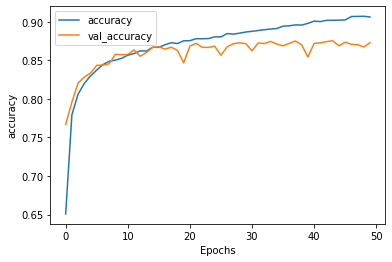

In [ ]:
plot_graphs(history,'accuracy')

In [ ]:
import tensorflow as tf

In [ ]:
test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [ ]:
prds = model.predict(X_test)

In [ ]:
prds.shape

(4000, 1)

In [ ]:
threshold_test = 0.5
result = [1 if pred>=threshold_test else 0 for pred in prds]
real_label = y_test
pre_label = np.array(result)
y = real_label == pre_label
print('True number :', np.sum(y!=0))
print('False number :', np.sum(y==0))

True number : 3436
False number : 564


In [ ]:
print('The accuracy on the test data:',np.sum(y!=0)/4000 )

The accuracy on the test data: 0.859
